# AMZ roBERTo Classifier

This notebook inspired in BERT/roBERTa models andd attaches an output layer that works as multiclassification. 
This model is trained with a spanish Amazon Reviews corpus.

In [1]:
# !pip install -qr https://raw.githubusercontent.com/ernestomancebo/roberto-mlm/master/requirements.txt

     |████████████████████████████████| 264 kB 5.3 MB/s 
     |████████████████████████████████| 3.3 MB 32.0 MB/s 
     |████████████████████████████████| 2.6 MB 30.5 MB/s 
     |████████████████████████████████| 76 kB 2.0 MB/s 
     |████████████████████████████████| 11.3 MB 36.5 MB/s 
     |████████████████████████████████| 10.3 MB 38.4 MB/s 
     |████████████████████████████████| 292 kB 48.1 MB/s 
     |████████████████████████████████| 119 kB 48.4 MB/s 
     |████████████████████████████████| 50 kB 6.0 MB/s 
     |████████████████████████████████| 243 kB 47.9 MB/s 
     |████████████████████████████████| 636 kB 47.2 MB/s 
     |████████████████████████████████| 895 kB 39.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.2 which is incompatible.
albumentations 

In [2]:
!pip install -q datasets transformer

     |████████████████████████████████| 264 kB 5.1 MB/s 
     |████████████████████████████████| 2.8 MB 34.9 MB/s 
     |████████████████████████████████| 50 kB 4.1 MB/s 
     |████████████████████████████████| 243 kB 45.4 MB/s 
     |████████████████████████████████| 119 kB 47.1 MB/s 
     |████████████████████████████████| 636 kB 41.6 MB/s 
     |████████████████████████████████| 3.3 MB 20.4 MB/s 
     |████████████████████████████████| 895 kB 39.4 MB/s 


In [1]:
from datasets import load_dataset

dataset = load_dataset("amazon_reviews_multi", "es")
dataset

Reusing dataset amazon_reviews_multi (/Users/ernestomancebo/.cache/huggingface/datasets/amazon_reviews_multi/es/1.0.0/724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609)


DatasetDict({
    train: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 200000
    })
    validation: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 5000
    })
    test: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 5000
    })
})

In [4]:
# !pip install -qU pandas-profiling

     |████████████████████████████████| 248 kB 5.2 MB/s 
     |████████████████████████████████| 62 kB 645 kB/s 
     |████████████████████████████████| 675 kB 37.9 MB/s 
     |████████████████████████████████| 102 kB 50.0 MB/s 
     |████████████████████████████████| 3.1 MB 29.8 MB/s 
     |████████████████████████████████| 10.1 MB 45.3 MB/s 
     |████████████████████████████████| 812 kB 41.0 MB/s 
     |████████████████████████████████| 28.5 MB 45 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.2 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but 

In [8]:
# !pip install -q -U watermark

In [9]:
# %reload_ext watermark
# %watermark -v -p numpy,pandas,torch,transformers

Python implementation: CPython
Python version       : 3.7.11
IPython version      : 5.5.0

numpy       : 1.19.5
pandas      : 1.3.2
torch       : 1.9.0+cu102
transformers: 4.9.2



In [4]:
train_df = dataset['train'].to_pandas()
validation_df = dataset['validation'].to_pandas()
test_df = dataset['test'].to_pandas()

In [7]:
train_df.sample(5)[['review_body', 'stars']]

,review_body,stars
198225,"Muy buena calidad,lo recomiendo,buen precio.",5
88584,"siempre compro de esta marca, pero esta prenda...",3
22808,No sé si es Bueno pues no lo he recebido. Me h...,1
183726,"Se la compre a mi hija, y perfecta la queda,la...",5
57167,Sonido excesivamente bajo. Cuidado con el diám...,2


In [8]:
from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='Paired', font_scale=1.2)
rcParams['figure.figsize']= 12,8

In [21]:
train_df.features

{'language': Value(dtype='string', id=None),
 'product_category': Value(dtype='string', id=None),
 'product_id': Value(dtype='string', id=None),
 'review_body': Value(dtype='string', id=None),
 'review_id': Value(dtype='string', id=None),
 'review_title': Value(dtype='string', id=None),
 'reviewer_id': Value(dtype='string', id=None),
 'stars': Value(dtype='int32', id=None)}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Start Rating')

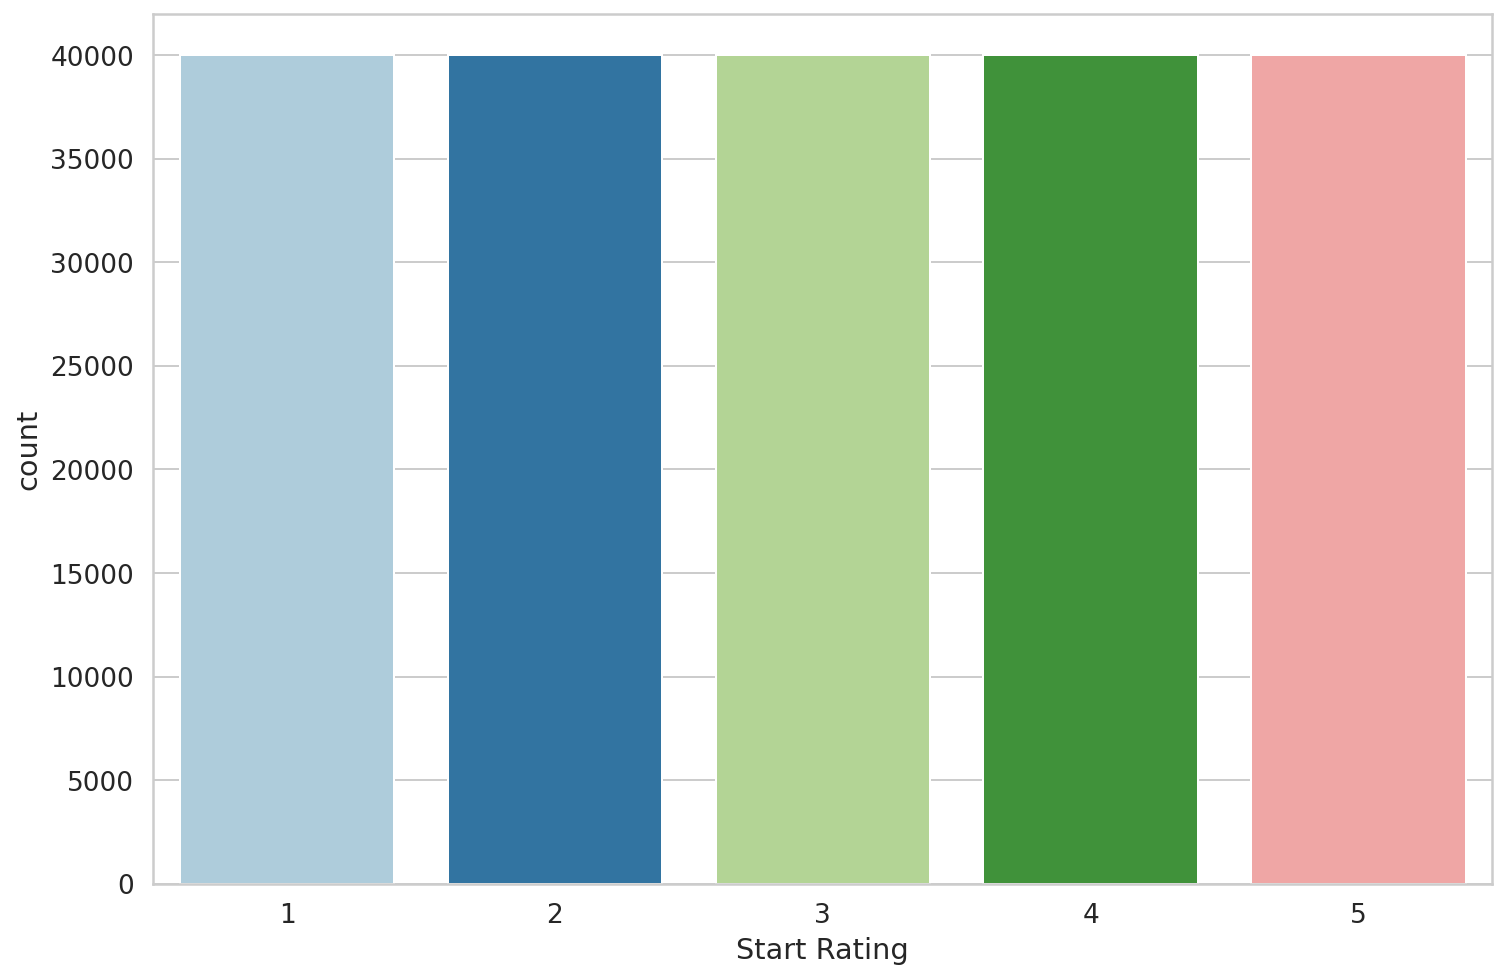

In [9]:
_ = sns.countplot(train_df['stars'])
plt.xlabel('Start Rating')


## Add `sentiment` column

Polarizes a bit the dataset by condensing the 1-2 as negative, the 4-5 as positive, keeping the neutral as neutral

In [10]:
def to_sentiment(rating):
    val = int(rating)

    if rating <= 2:
        return 0
    elif rating == 3:
        return 1
    else:
        return 2


In [11]:
train_df['sentiment'] = train_df['stars'].apply(to_sentiment)
test_df['sentiment'] = test_df['stars'].apply(to_sentiment)
validation_df['sentiment'] = validation_df['stars'].apply(to_sentiment)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')]

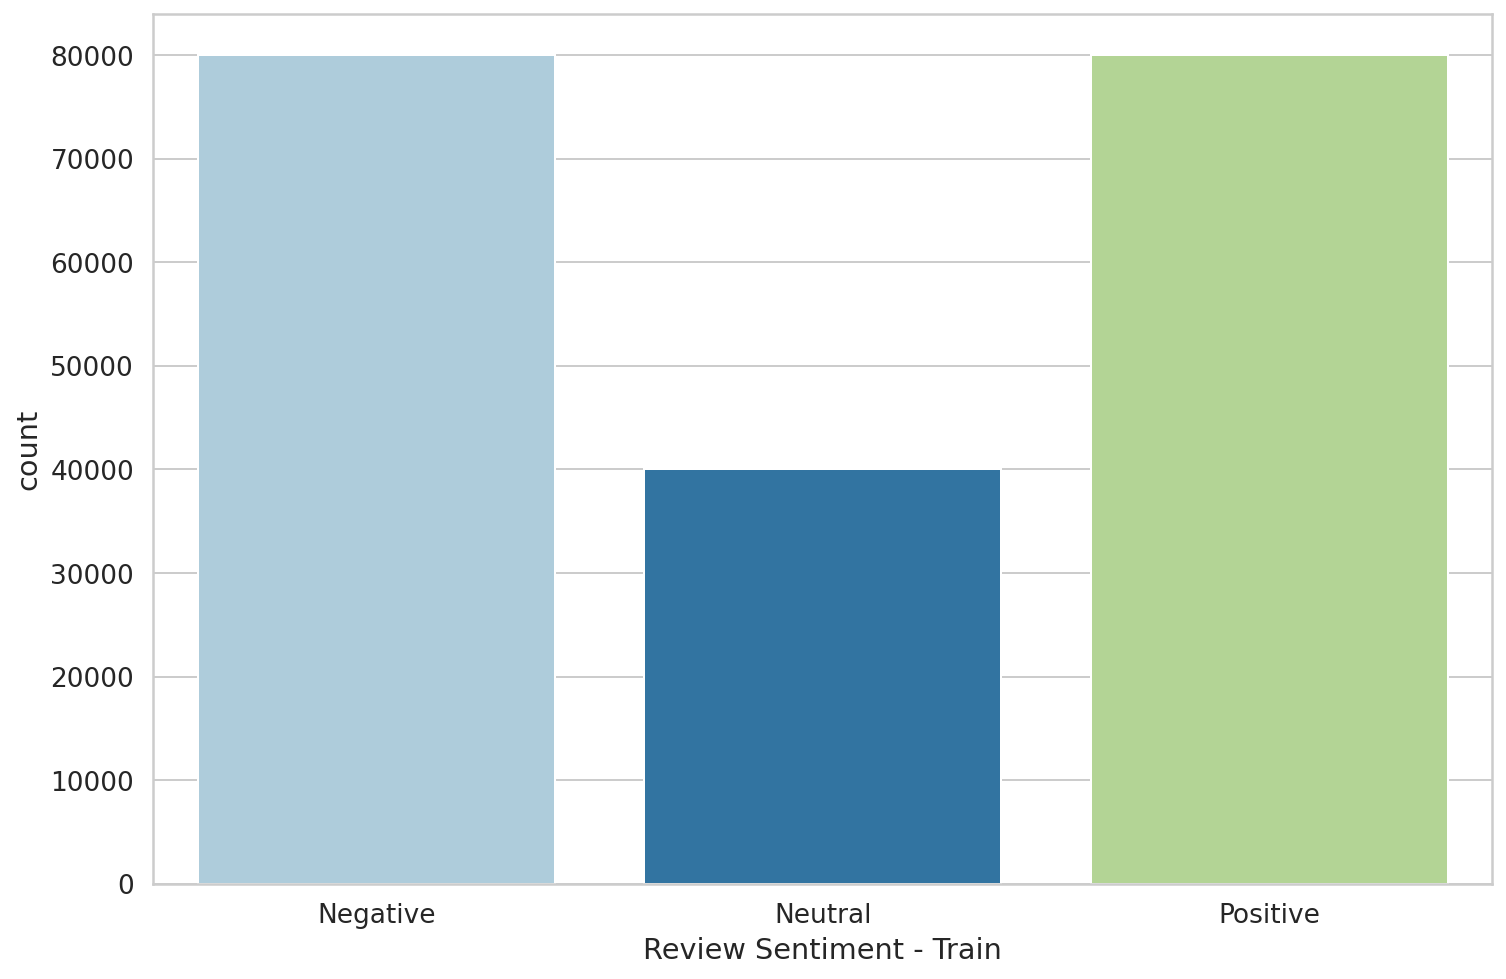

In [12]:
class_names = ['Negative', 'Neutral', 'Positive']

ax = sns.countplot(train_df['sentiment'])
plt.xlabel('Review Sentiment - Train')
ax.set_xticklabels(class_names)


## Data pre-processing

In [2]:
from transformers import BertTokenizer


In [3]:
MODEL_NAME = 'Geotrend/bert-base-es-cased'


In [4]:
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)


In spanish, most of the sentences weight and intention are left at the very end, so, we're using the `clip_sequence` function so we can extract most of the scence of each sequence more purely.

In [10]:
def clip_sequence(sequence, trailing_token_size):
    if type(sequence) == str:
        sequence = sequence.split()
    return sequence[-trailing_token_size:]


In [11]:
clip_sequence("hola, buenas tardes", 2), clip_sequence("hola, buenas tardes", 25)

(['buenas', 'tardes'], ['hola,', 'buenas', 'tardes'])

### Choosing sequence length

In [16]:
token_lens = []

for s in train_df['review_body']:
  tokens = tokenizer.encode(s, max_length=512, truncation=True)
  token_lens.append(len(tokens))

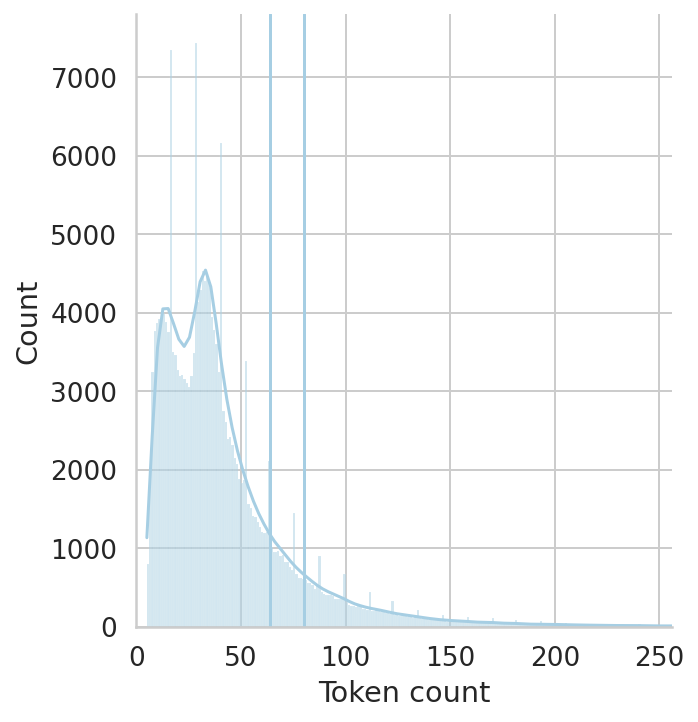

In [17]:
sns.displot(token_lens, kde=True)
plt.xlim([0,256])
plt.xlabel('Token count')

plt.axvline(x=80)
plt.axvline(x=64)


Most of the population of our dataset are up to 150 token per instance, in the past we used a barely `64`, now we're going further and pushing up to `160`.

In [17]:
SEQ_MAX_LEN = 160

### Building datasets

To not modify already written code (which is useful still), we're clipping the sequence by default

In [15]:
def tokenize_sequence(sequence, clip_seq=True):
    if clip_seq:
        sequence = clip_sequence(sequence, SEQ_MAX_LEN)

    tokens = tokenizer.encode_plus(sequence,
                                   max_length=SEQ_MAX_LEN,
                                   truncation=True,
                                   padding='max_length',
                                   add_special_tokens=True,
                                   return_tensors='tf')
    return tokens


In [16]:
# SEQ_MAX_LEN = 2
# SEQ_MAX_LEN = 160

tokenize_sequence('hola, buen dia')

{'input_ids': <tf.Tensor: shape=(1, 2), dtype=int32, numpy=array([[11, 12]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(1, 2), dtype=int32, numpy=array([[0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 2), dtype=int32, numpy=array([[1, 1]], dtype=int32)>}

In [20]:
train_df.shape


(200000, 9)

In [21]:
from sklearn.model_selection import train_test_split


In [23]:
RANDOM_SEED = 25

In [69]:
train_set, _ = train_test_split(
    train_df,
    train_size=0.4,
    random_state=RANDOM_SEED,
    shuffle=True,
    stratify=train_df['sentiment']
)

train_set.shape


(120000, 9)

### Train and Validation sets

In [25]:
import numpy as np


In [26]:
np.random.seed(RANDOM_SEED)


In [27]:
def tokenize_dataframe(df, seq_max_len=SEQ_MAX_LEN):
    Xids = np.zeros((df.shape[0], seq_max_len))
    Xmask = np.zeros((df.shape[0], seq_max_len))

    for i, review in enumerate(df['review_body']):
        tokens = tokenize_sequence(review)

        Xids[i, :] = tokens['input_ids']
        Xmask[i, :] = tokens['attention_mask']

    return Xids, Xmask


In [28]:
def label_as_vector(df, target='sentiment'):
    labels = np.zeros((df.shape[0], df[target].max() + 1))

    for i, label in enumerate(df[target]):
        labels[i, label] = 1

    return labels


In [70]:
Xids_train, Xmask_train = tokenize_dataframe(train_set)
Xids_val, Xmask_val = tokenize_dataframe(validation_df)


In [71]:
labels_train = label_as_vector(train_set)
labels_val = label_as_vector(validation_df)

labels_train[:4]


array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [72]:
Xids_train.shape, Xids_val.shape


((120000, 64), (5000, 64))

### Serializing training vectors

Here we store as numpy vectors the `Xids_train,validation` and `Xmask_train,validation`

In [32]:
import os


In [33]:
def serialize_tensors(tensor, name, path):
    with open(f'{os.sep.join([path, name])}', 'wb') as file:
        np.save(file, tensor)


In [34]:
def load_tensors(name, path):
    with open(os.sep.join([path, name]), 'rb') as f:
        return np.load(f)


In [35]:
tensors_path = os.sep.join(['.', 'tensors', 'classifier', 'amz', '60k'])


In [36]:
!mkdir -p {tensors_path}


Here we persist the vectors in the `tensor_path`

In [ ]:
# serialize_tensors(Xids_train, 'Xids_train.npy', tensors_path)
# serialize_tensors(Xmask_train, 'Xmask_train.npy', tensors_path)
# serialize_tensors(labels_train, 'labels_train.npy', tensors_path)

# !ls {tensors_path}


labels.npy  Xids.npy  Xmask.npy


In [ ]:
# serialize_tensors(Xids_val, 'Xids_val.npy', tensors_path)
# serialize_tensors(Xmask_vaXids_val, 'Xmask_vaXids_val.npy', tensors_path)
# serialize_tensors(labels_vaXids_val, 'labels_vaXids_val.npy', tensors_path)

# !ls {tensors_path}


In [ ]:
# del Xids_train, Xmask_train, labels_train
# del Xids_val, Xmask_val, labels_val


Here we reload the tensors from the `tensors_path`

In [37]:
!ls {tensors_path}

In [ ]:
# Xids_train = load_tensors('Xids_train.npy', tensors_path)
# Xmask_train = load_tensors('Xmask_train.npy', tensors_path)
# labels_train = load_tensors('labels_train.npy', tensors_path)


In [ ]:
# Xids_val = load_tensors('Xids_val.npy', tensors_path)
# Xmask_val = load_tensors('Xmask_val.npy', tensors_path)
# labels_val = load_tensors('labels_val.npy', tensors_path)


---

## Input pipeline

In [38]:
import tensorflow as tf


In [39]:
tf.random.set_seed(RANDOM_SEED)


In [40]:
devices = tf.config.experimental.list_physical_devices('GPU')
devices


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Here we build sum `Dataset` from the built vectors

In [84]:
train_dataset = tf.data.Dataset.from_tensor_slices(
    (Xids_train, Xmask_train, labels_train))
val_dataset = tf.data.Dataset.from_tensor_slices(
    (Xids_val, Xmask_val, labels_val))


In [85]:
train_dataset.take(1)


<TakeDataset shapes: ((64,), (64,), (3,)), types: (tf.float64, tf.float64, tf.float64)>

In [43]:
def map_tensor(input_ids, masks, labels):
    return {'input_ids': input_ids, 'attention_mask': masks}, labels


In [86]:
train_dataset = train_dataset.map(map_tensor)
val_dataset = val_dataset.map(map_tensor)

train_dataset.take(1)


<TakeDataset shapes: ({input_ids: (64,), attention_mask: (64,)}, (3,)), types: ({input_ids: tf.float64, attention_mask: tf.float64}, tf.float64)>

In [87]:
train_dataset = train_dataset.shuffle(100_000).batch(128, drop_remainder=False)
val_dataset = val_dataset.shuffle(10_000).batch(128, drop_remainder=False)

train_dataset.take(1)


<TakeDataset shapes: ({input_ids: (None, 64), attention_mask: (None, 64)}, (None, 3)), types: ({input_ids: tf.float64, attention_mask: tf.float64}, tf.float64)>

---

## Training the model

In [46]:
from transformers import TFBertModel


In [47]:
bert = TFBertModel.from_pretrained(MODEL_NAME)


Downloading:   0%|          | 0.00/510M [00:00<?, ?B/s]

Some layers from the model checkpoint at Geotrend/bert-base-es-cased were not used when initializing TFBertModel: ['mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at Geotrend/bert-base-es-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [48]:
bert.summary()

Model: "tf_bert_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  106285056 
Total params: 106,285,056
Trainable params: 106,285,056
Non-trainable params: 0
_________________________________________________________________


In [49]:
len(class_names)

3

In [50]:
input_ids = tf.keras.layers.Input(
    shape=(SEQ_MAX_LEN,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(
    shape=(SEQ_MAX_LEN,), name='attention_mask', dtype='int32')

embedings = bert.bert(input_ids, attention_mask=mask)[1]

# x = tf.keras.layers.Flatten()(embedings)
x = tf.keras.layers.Dropout(0.3)(embedings)
x = tf.keras.layers.Dense(128, activation='relu')(x)

# There're only three possible outcomes
y = tf.keras.layers.Dense(
    len(class_names), activation='softmax', name='outputs')(x)

model = tf.keras.Model(inputs=[input_ids, mask], outputs=y)

model.layers[2].trainable = False


In [51]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 64)]         0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 64)]         0                                            
__________________________________________________________________________________________________
bert (TFBertMainLayer)          TFBaseModelOutputWit 106285056   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
dropout_37 (Dropout)            (None, 768)          0           bert[0][1]                   

In [52]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5, decay=1e-6)
loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[acc])


In [82]:
EPOCHS = 6


Here we mount google colab, so if train finishes but I'm iddle we still can store it

In [54]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    from google.colab import drive

    drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [88]:
hist = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=EPOCHS,
)


Epoch 1/6
938/938 [==============================] - 998s 1s/step - loss: 0.9859 - accuracy: 0.5401 - val_loss: 0.9500 - val_accuracy: 0.5828
Epoch 2/6
938/938 [==============================] - 993s 1s/step - loss: 0.9745 - accuracy: 0.5473 - val_loss: 0.9364 - val_accuracy: 0.5914
Epoch 3/6
938/938 [==============================] - 991s 1s/step - loss: 0.9632 - accuracy: 0.5543 - val_loss: 0.9255 - val_accuracy: 0.5964
Epoch 4/6
938/938 [==============================] - 997s 1s/step - loss: 0.9572 - accuracy: 0.5580 - val_loss: 0.9164 - val_accuracy: 0.5994
Epoch 5/6
938/938 [==============================] - 993s 1s/step - loss: 0.9503 - accuracy: 0.5633 - val_loss: 0.9101 - val_accuracy: 0.6016
Epoch 6/6
938/938 [==============================] - 993s 1s/step - loss: 0.9452 - accuracy: 0.5656 - val_loss: 0.9048 - val_accuracy: 0.6026


---

### Persisting the built model

In [89]:
model.save('sentiment_roberto_v3_dbl')

INFO:tensorflow:Assets written to: sentiment_roberto_v3_dbl/assets


INFO:tensorflow:Assets written to: sentiment_roberto_v3_dbl/assets
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [90]:
!zip -r sentiment_roberto_v3_dbl.zip sentiment_roberto_v3_dbl

  adding: sentiment_roberto_v3_dbl/ (stored 0%)
  adding: sentiment_roberto_v3_dbl/assets/ (stored 0%)
  adding: sentiment_roberto_v3_dbl/saved_model.pb (deflated 92%)
  adding: sentiment_roberto_v3_dbl/keras_metadata.pb (deflated 95%)
  adding: sentiment_roberto_v3_dbl/variables/ (stored 0%)
  adding: sentiment_roberto_v3_dbl/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: sentiment_roberto_v3_dbl/variables/variables.index (deflated 76%)


If in google colab, persist it to Google Drive

In [91]:
if IN_COLAB:
    !cp sentiment_roberto_v3_dbl.zip "/content/gdrive/MyDrive/proyectos/machine learning/sentiment_analysis/"


## Observing model progress during training

In [92]:
model_history = hist.history
model_history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

(0.0, 1.0)

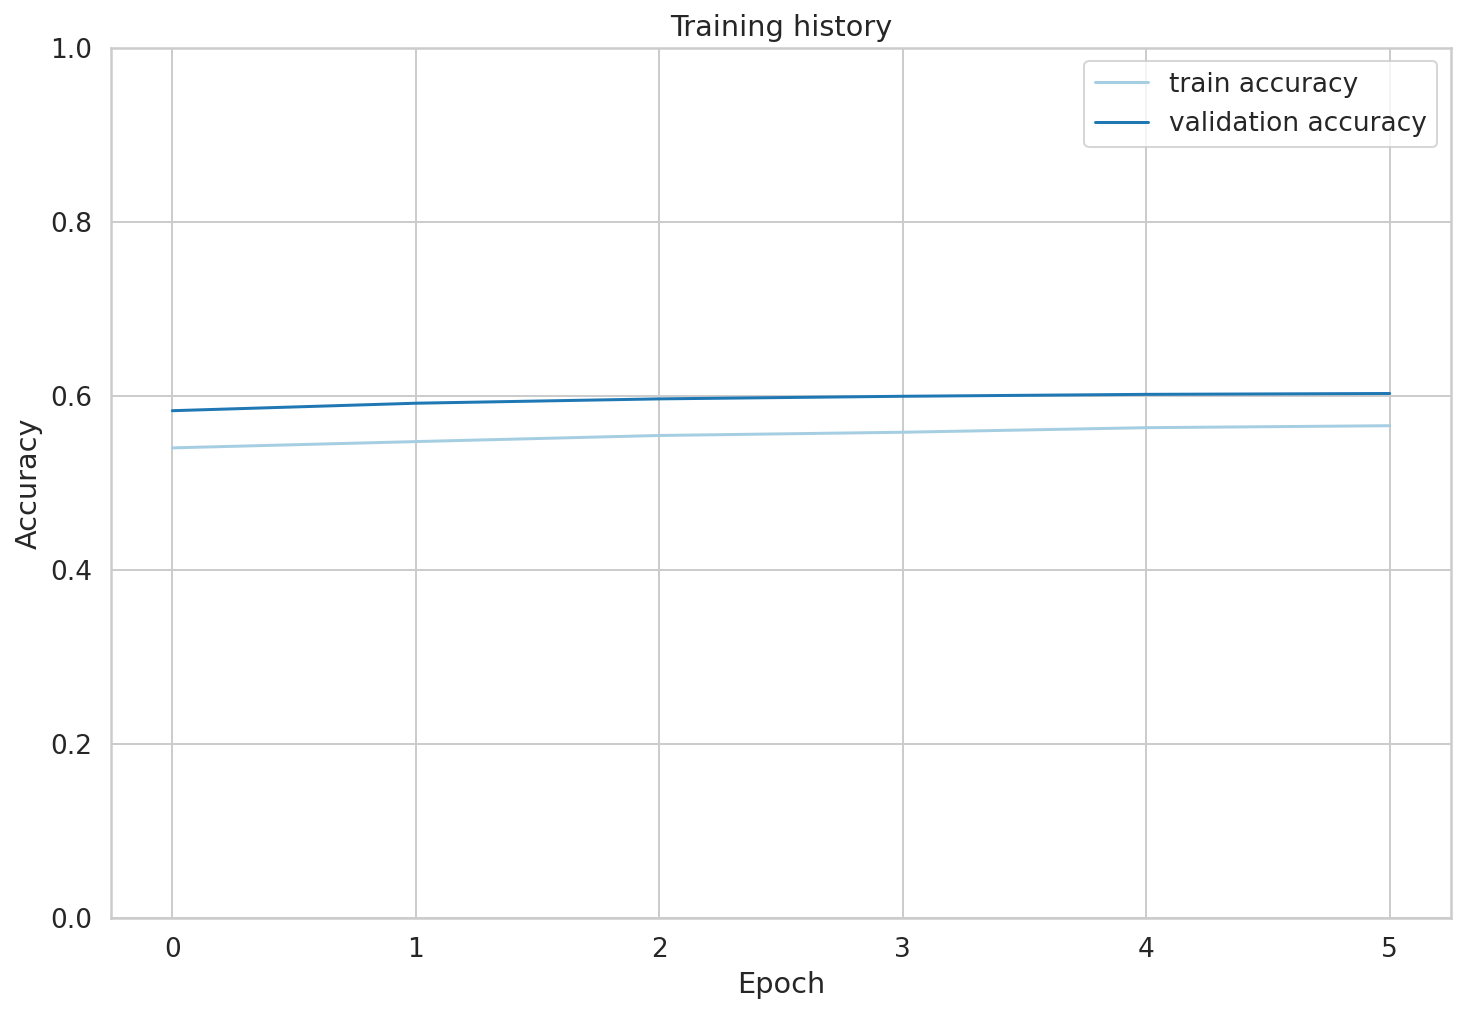

In [93]:
plt.plot(model_history['accuracy'], label='train accuracy')
plt.plot(model_history['val_accuracy'], label='validation accuracy')

plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1])


## Observing model metrics

In [94]:
def prepare_data(text):
    tokens = tokenize_sequence(text)
    return {'input_ids': tf.cast(tokens['input_ids'], tf.float64),
            'attention_mask': tf.cast(tokens['attention_mask'], tf.float64)}


In [97]:
def get_predictions(model, df):
    review_texts = []
    predictions = []
    prediction_probs = []
    real_values = []

    for idx, r in df.iterrows():
        # Input data
        texts = r['review_body']
        y_true = r['sentiment']

        # Model Output
        probs = model.predict(prepare_data(texts))[0]
        pred = np.argmax(probs)

        # Append result for a later evaluation
        review_texts.append(texts)
        predictions.append(pred)
        prediction_probs.append(probs)
        real_values.append(y_true)

    return review_texts, predictions, prediction_probs, real_values


In [98]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
    model,
    test_df
)

In [99]:
from sklearn.metrics import classification_report


In [100]:
print(classification_report(y_test, y_pred, target_names=class_names))


              precision    recall  f1-score   support

    Negative       0.60      0.76      0.67      2000
     Neutral       0.00      0.00      0.00      1000
    Positive       0.61      0.76      0.68      2000

    accuracy                           0.61      5000
   macro avg       0.40      0.51      0.45      5000
weighted avg       0.49      0.61      0.54      5000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
from sklearn.metrics import confusion_matrix
import pandas as pd


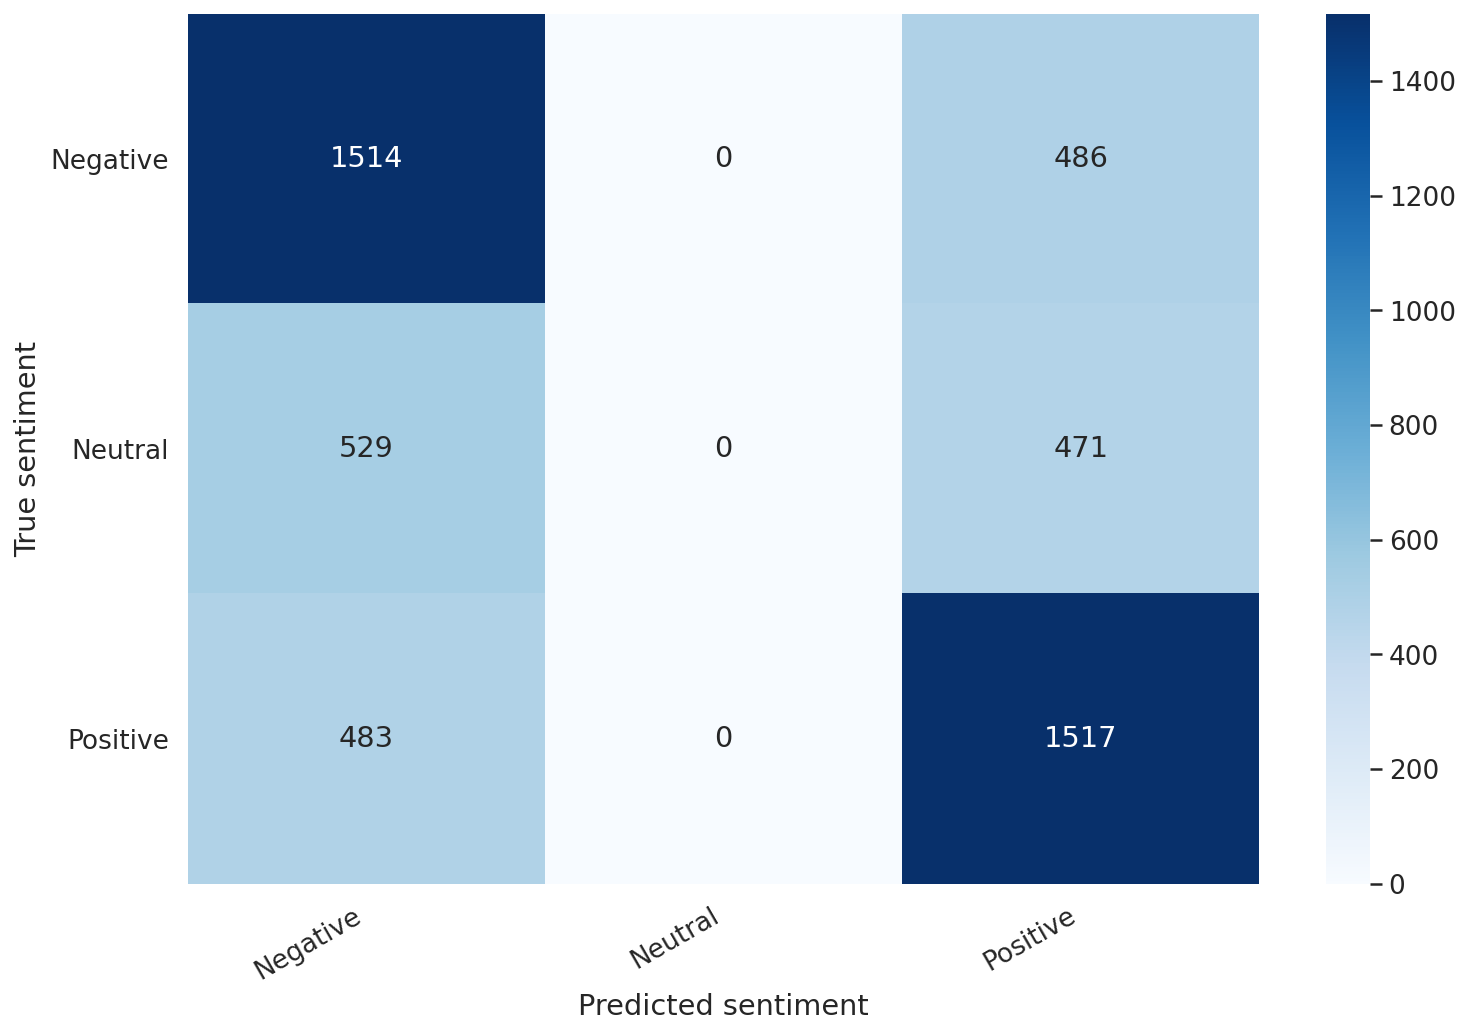

In [102]:
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(
        hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(
        hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True sentiment')
    plt.xlabel('Predicted sentiment')


cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)


In [103]:
model.save('sentiment_roberto_v3_dbl.h5')


In [105]:
!ls -lh

total 1.2G
drwx------ 6 root root 4.0K Sep  5 12:33 gdrive
drwxr-xr-x 1 root root 4.0K Sep  1 19:26 sample_data
drwxr-xr-x 4 root root 4.0K Sep  5 13:11 sentiment_roberto_v3
drwxr-xr-x 4 root root 4.0K Sep  5 15:13 sentiment_roberto_v3_dbl
-rw-r--r-- 1 root root 407M Sep  5 15:25 sentiment_roberto_v3_dbl.h5
-rw-r--r-- 1 root root 378M Sep  5 15:14 sentiment_roberto_v3_dbl.zip
-rw-r--r-- 1 root root 378M Sep  5 13:12 sentiment_roberto_v3.zip
drwxr-xr-x 3 root root 4.0K Sep  5 12:30 tensors


In [107]:
if IN_COLAB:
    !cp sentiment_roberto_v3_dbl.h5 "/content/gdrive/MyDrive/proyectos/machine learning/sentiment_analysis/"
